In [30]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_seq_items', None)
pd.set_option('display.width', 10)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans 
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# 1. 데이터 로드

1. 사용 데이터셋
- (원자료) 2019년 국민여행조사_국내여행.xlsx (48269개)

In [2]:
# 데이터 로드
df = pd.read_csv('(원자료) 2019년 국민여행조사_국내여행.csv')
df

,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,...,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
0,11010550341_1000000,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010550341_1000005,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550341_1000007,2,0,1,2,2,2,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010550341_1000012,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010550341_1000013,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264,39020620091_1382329,0,0,2,2,2,2,2,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48265,39020620091_1382420,0,0,2,2,2,2,2,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48266,39020620091_1382421,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48267,39020620091_1382423,1,0,2,2,1,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. 제시된 조건에 맞는 응답자 추출
- D_TRA1_1_SPOT: (1차 여행지 1차 방문지의 방문지역)
- 데이터에는 1-8차 여행지, 각 여행지마다 1~10차 방문지 존재
- 전체 데이터 중 1차 여행만 기입한 데이터 27321개 만 활용

In [3]:
print("1차 방문지 기입자 수:", df['D_TRA1_1_SPOT1'].notnull().sum(),'명')
print("2차 방문지 기입자 수:", df['D_TRA1_1_SPOT2'].notnull().sum(),'명') # 2차방문지부터는 유의미하지 않다고 판단 -> 1차 응답기준으로만 분석
print("3차 방문지 기입자 수:", df['D_TRA1_1_SPOT3'].notnull().sum(),'명')
print("4차 방문지 기입자 수:", df['D_TRA1_1_SPOT4'].notnull().sum(),'명')
print("5차 방문지 기입자 수:", df['D_TRA1_1_SPOT5'].notnull().sum(),'명')
print("6차 방문지 기입자 수:", df['D_TRA1_1_SPOT6'].notnull().sum(),'명')

1차 방문지 기입자 수: 27321 명
2차 방문지 기입자 수: 435 명
3차 방문지 기입자 수: 46 명
4차 방문지 기입자 수: 6 명
5차 방문지 기입자 수: 1 명
6차 방문지 기입자 수: 1 명


### 여행루트 조건
1. MZ세대
2. 여행목적의 방문일 것
4. 동반여행 인원 3인
5. 총 사용 지출 300만원이내
- 해당 조건들을 활용하여 응답자 추출

In [4]:
df= df.astype({'D_TRA1_NUM':'float'})
df= df.astype({'D_TRA1_COST':'float'})

df = df.loc[df['BAGE'] < 5]  # MZ 세대 응답자만 추출 , mz 세대 정의: 만 15~42세
df = df.loc[(df['MON_EXP_1']==1)|(df['MON_EXP_2']==1)|(df['MON_EXP_4']==1)] # 여행 목적이 아닌 경우 삭제 (관광, 휴양 목적이 아닌 경우 분석 목적에 맞지 않다고 판단)
df = df.loc[ (df['D_TRA1_NUM'] > 1) & (df['D_TRA1_NUM'] < 6)] # 동반인원 3인 단체관광, 혼자관광제외
df = df.loc[df['D_TRA1_COST'] < 3000000] # 지출비용 300만원 이내
df

,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,S5,...,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
0,11010550341_1000000,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010550341_1000012,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1101057010A_1000056,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1101057010A_1000057,1,0,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1101057010A_1000065,2,0,1,1,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48103,39020550051_1093768,1,1,1,2,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48109,39020550051_1093841,1,0,2,1,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48130,3902057051A_1221662,2,1,1,1,2,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48133,3902057051A_1221675,3,1,1,1,2,2,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 분석에는 총 9019명의 설문 데이터를 활용

In [5]:
# 파일 내보내기
df.to_csv('travel_survey.csv', index = False, encoding = 'utf-8-sig')

# 3. 설문 응답 전처리

### 분석에 활용가능한 변수 리스트 
- 참고: 2019년 국민여행조사 유저가이드 

##### A2_1 -3: 여행지선택이유
    1. 여행지 지명도
    2. 볼거리 제공
    3. 저렴한 여행경비
    4. 이동 거리
    5. 여행할 수 있는 시간
    6. 숙박시설
    7. 쇼핑
    8. 음식
    9. 교통편
    10. 체험 프로그램 유무
    11. 경험자의 추천
    12. 관광지 편의시설
    13. 교육성(교육적측면)
    14. 여행 동반자 유형
    15. 기타
    

##### A3_1 -21: 여행활동 
    1. 자연 및 풍경감상
    2. 음식관광(지역 맛집 등)
    3. 야외위락 및 스포츠, 레포츠활동
    4. 역사유적지방문
    5. 테마파크, 놀이시설,동/식물원방문
    6. 휴식/휴양
    7. 온천/스파
    8. 쇼핑
    9. 지역 문화예술/공연/전시시설 관람
    10. 스포츠 경기관람
    11. 지역 축제/이벤트 참가
    12. 교육/체험프로그램 참가
    13. 종교/성지순례
    14. 카지노, 경마, 경륜 등
    15. 시티투어
    16. 드라마 촬영지 방문
    17. 유흥/오락
    18. 가족/친지/친구 방문
    19. 회의참가/시찰
    20. 교육/훈련/연수
    21. 기타
    
#### NA10A - I: 여행지 지출 (1인당)
    A. 여행사
    B. 여행회비
    C. 숙박비
    D. 음식점
    E. 교통비
    F. 여행활동비
    G. 쇼핑비
    H. 귀금속
    I. 기타    


###  복수 선택 변수 전처리
- 선호여행 테마 (A3_1 ~ A3_21)
- 숫자가 있으면 1 없으면 0으로 변경


In [6]:
# 여행활동
for i in range(0,21):
    col_name = 'A3_{}'.format(i+1)
    for j in df.index:
        if pd.isnull(df.loc[j, col_name]):
            df.loc[j, col_name] =0
        else:
            df.loc[j, col_name] =1

In [7]:
# 변수 선택 
idx = [
        # 식별변수
        'ID', 

        # 범주형 변수
          'A2_1',
          'A3_1', 'A3_2', 'A3_3','A3_4', 'A3_5', 'A3_6', 'A3_7', 'A3_8','A3_9','A3_10','A3_11','A3_12',
          'A3_13','A3_14','A3_15','A3_16','A3_17','A3_18','A3_19','A3_20',
          'A6_1','A6_2','A6_3','A6_4','A6_5','A6_7','A6_8','A6_9','A6_10','A6_11','A6_12','A6_13',

        # 연속형 변수
        'NA10A','NA10B','NA10C','NA10D','NA10E','NA10F','NA10G','NA10H','NA10I',
    
      ]

df = df[idx]

In [8]:
# 변수명 변경
df.rename(columns = {
'ID':'ID',
'A2_1':'여행지선택이유',
'A5_1':'주요이용교통수단',
'BAGE':'연령',
'A3_1':'자연 및 풍경감상',
'A3_2':'음식관광',
'A3_3':'야외스포츠/레포츠활동',
'A3_4':'역사유적지방문',
'A3_5':'테마파크/놀이시설/동/식물원방문',
'A3_6':'휴식/휴양',
'A3_7':'온천/스파',
'A3_8':'쇼핑',
'A3_9':'지역 문화예술/공연/전시시설 관람',
'A3_10':'스포츠 경기관람',
'A3_11':'지역 축제/이벤트 참가',
'A3_12':'교육/체험프로그램 참가',
'A3_13':'종교/성지순례',
'A3_14':'카지노, 경마, 경륜 등',
'A3_15':'시티투어',
'A3_16':'드라마 촬영지 방문',
'A3_17':'유흥/오락',
'A3_18':'가족/친지/친구 방문',
'A3_19':'회의참가/시찰',
'A3_20':'교육/훈련/연수',
'A6_1':'호텔',
'A6_2':'모텔/여관',
'A6_3':'펜션',
'A6_4':'콘도미니엄/리조트',
'A6_5':'유스호스텔',
'A6_6':'야영(캠핑)',
'A6_7':'연수원/수련원',
'A6_8':'전통 한옥 숙박시설',
'A6_9':'게스트하우스',
'A6_10':'민박(도시형/농촌형)',
'A6_11':'자연휴양림 내 숙박시설',
'A6_12':'가족/친지집',
'A6_13':'무박 여행',
'NA10A':'지출_여행사',
'NA10B':'지출_여행회비',
'NA10C':'지출_숙박비',
'NA10D':'지출_음식점',
'NA10E':'지출_교통비',
'NA10F':'지출_여행활동비',
'NA10G':'지출_쇼핑비',
'NA10H':'지출_귀금속',
'NA10I':'지출_기타' }, inplace = True)

In [9]:
# 범주형 변수 한국어로
df.loc[df['여행지선택이유'] == 1, '여행지선택이유'] = '여행지 지명도'
df.loc[df['여행지선택이유'] == 2, '여행지선택이유'] = '볼거리 제공'
df.loc[df['여행지선택이유'] == 3, '여행지선택이유'] = '저렴한 여행경비'
df.loc[df['여행지선택이유'] == 4, '여행지선택이유'] = '이동 거리'
df.loc[df['여행지선택이유'] == 5, '여행지선택이유'] = '여행할 수 있는 시간'
df.loc[df['여행지선택이유'] == 6, '여행지선택이유'] = '숙박시설'
df.loc[df['여행지선택이유'] == 7, '여행지선택이유'] = '쇼핑'
df.loc[df['여행지선택이유'] == 8, '여행지선택이유'] = '음식'
df.loc[df['여행지선택이유'] == 9, '여행지선택이유'] = '교통편'
df.loc[df['여행지선택이유'] == 10, '여행지선택이유'] = '체험 프로그램 유무'
df.loc[df['여행지선택이유'] == 11, '여행지선택이유'] = '경험자의 추천'
df.loc[df['여행지선택이유'] == 12, '여행지선택이유'] = '관광지 편의시설'
df.loc[df['여행지선택이유'] == 13, '여행지선택이유'] = '교육성(교육적측면)'
df.loc[df['여행지선택이유'] == 14, '여행지선택이유'] = '여행 동반자 유형'
df.loc[df['여행지선택이유'] == 15, '여행지선택이유'] = '기타'

In [10]:
# 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9019 entries, 0 to 48227
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9019 non-null   object 
 1   여행지선택이유             9019 non-null   object 
 2   자연 및 풍경감상           9019 non-null   float64
 3   음식관광                9019 non-null   float64
 4   야외스포츠/레포츠활동         9019 non-null   float64
 5   역사유적지방문             9019 non-null   float64
 6   테마파크/놀이시설/동/식물원방문   9019 non-null   float64
 7   휴식/휴양               9019 non-null   float64
 8   온천/스파               9019 non-null   float64
 9   쇼핑                  9019 non-null   float64
 10  지역 문화예술/공연/전시시설 관람  9019 non-null   float64
 11  스포츠 경기관람            9019 non-null   float64
 12  지역 축제/이벤트 참가        9019 non-null   float64
 13  교육/체험프로그램 참가        9019 non-null   float64
 14  종교/성지순례             9019 non-null   float64
 15  카지노, 경마, 경륜 등       9019 non-null   float64
 16  시티투어 

In [11]:
# 확인
df['여행지선택이유'].value_counts()

볼거리 제공         1924
여행지 지명도        1502
여행할 수 있는 시간     922
이동 거리           887
여행 동반자 유형       885
음식              715
경험자의 추천         487
저렴한 여행경비        469
교통편             308
관광지 편의시설        242
숙박시설            238
교육성(교육적측면)      148
쇼핑              109
체험 프로그램 유무       95
기타               88
Name: 여행지선택이유, dtype: int64

####  다음 변수들을 분석에 필요없다고 판단
- '종교/성지순례','카지노, 경마, 경륜 등','가족/친지/친구 방문','회의참가/시찰','교육/훈련/연수'
- '지출_여행사','지출_여행회비','지출_귀금속','지출_기타'

In [12]:
# 분석에 필요한 변수만 남기기
idx = ['여행지선택이유',
       '자연 및 풍경감상',
       '음식관광',
       '야외스포츠/레포츠활동',
       '역사유적지방문',
       '테마파크/놀이시설/동/식물원방문',
       '휴식/휴양',
       '온천/스파',
       '쇼핑',
       '지출_숙박비',
       '지출_음식점',
       '지출_교통비',
       '지출_여행활동비',
       '지출_쇼핑비'
      ]

# 4. k-prototypes Clustering 모형 구축

In [13]:
df_proto = df[idx].copy()

In [14]:
df_proto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9019 entries, 0 to 48227
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   여행지선택이유            9019 non-null   object 
 1   자연 및 풍경감상          9019 non-null   float64
 2   음식관광               9019 non-null   float64
 3   야외스포츠/레포츠활동        9019 non-null   float64
 4   역사유적지방문            9019 non-null   float64
 5   테마파크/놀이시설/동/식물원방문  9019 non-null   float64
 6   휴식/휴양              9019 non-null   float64
 7   온천/스파              9019 non-null   float64
 8   쇼핑                 9019 non-null   float64
 9   지출_숙박비             9019 non-null   float64
 10  지출_음식점             9019 non-null   float64
 11  지출_교통비             9019 non-null   float64
 12  지출_여행활동비           9019 non-null   float64
 13  지출_쇼핑비             9019 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.3+ MB


In [15]:
# 연속형 변수는 Pre-processing (범주형 변수는 필요없음)
num = ['지출_숙박비','지출_음식점','지출_교통비','지출_여행활동비','지출_쇼핑비']

for c in num:
    scaler = MinMaxScaler()
    df_proto[c] = scaler.fit_transform(np.array(df_proto[c]).reshape(-1, 1))
    
# 잘 되었나 확인
df_proto.describe()

,자연 및 풍경감상,음식관광,야외스포츠/레포츠활동,역사유적지방문,테마파크/놀이시설/동/식물원방문,휴식/휴양,온천/스파,쇼핑,지출_숙박비,지출_음식점,지출_교통비,지출_여행활동비,지출_쇼핑비
count,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000
mean,0.741989,0.526112,0.049451,0.100787,0.099568,0.559707,0.026832,0.070629,0.035421,0.081630,0.059920,0.016591,0.017434
std,0.437564,0.499345,0.216820,0.301063,0.299439,0.496450,0.161602,0.256218,0.063961,0.069180,0.070895,0.038482,0.037828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.025000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.063158,0.041489,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.055556,0.105263,0.066667,0.020000,0.020000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_proto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9019 entries, 0 to 48227
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   여행지선택이유            9019 non-null   object 
 1   자연 및 풍경감상          9019 non-null   float64
 2   음식관광               9019 non-null   float64
 3   야외스포츠/레포츠활동        9019 non-null   float64
 4   역사유적지방문            9019 non-null   float64
 5   테마파크/놀이시설/동/식물원방문  9019 non-null   float64
 6   휴식/휴양              9019 non-null   float64
 7   온천/스파              9019 non-null   float64
 8   쇼핑                 9019 non-null   float64
 9   지출_숙박비             9019 non-null   float64
 10  지출_음식점             9019 non-null   float64
 11  지출_교통비             9019 non-null   float64
 12  지출_여행활동비           9019 non-null   float64
 13  지출_쇼핑비             9019 non-null   float64
dtypes: float64(13), object(1)
memory usage: 1.3+ MB


In [40]:
df_proto.loc[df_proto['여행지선택이유'] == '여행지 지명도', '여행지선택이유'] = 1
df_proto.loc[df_proto['여행지선택이유'] == '볼거리 제공', '여행지선택이유'] = 2
df_proto.loc[df_proto['여행지선택이유'] == '저렴한 여행경비', '여행지선택이유'] = 3
df_proto.loc[df_proto['여행지선택이유'] == '이동 거리', '여행지선택이유'] = 4
df_proto.loc[df_proto['여행지선택이유'] == '여행할 수 있는 시간', '여행지선택이유'] = 5
df_proto.loc[df_proto['여행지선택이유'] == '숙박시설', '여행지선택이유'] = 6
df_proto.loc[df_proto['여행지선택이유'] == '쇼핑', '여행지선택이유'] = 7
df_proto.loc[df_proto['여행지선택이유'] == '음식', '여행지선택이유'] = 8
df_proto.loc[df_proto['여행지선택이유'] == '교통편', '여행지선택이유'] = 9
df_proto.loc[df_proto['여행지선택이유'] == '체험 프로그램 유무', '여행지선택이유'] = 10
df_proto.loc[df_proto['여행지선택이유'] == '경험자의 추천', '여행지선택이유'] = 11
df_proto.loc[df_proto['여행지선택이유'] == '관광지 편의시설', '여행지선택이유'] = 12
df_proto.loc[df_proto['여행지선택이유'] == '교육성(교육적측면)', '여행지선택이유'] = 13
df_proto.loc[df_proto['여행지선택이유'] == '여행 동반자 유형', '여행지선택이유'] = 14
df_proto.loc[df_proto['여행지선택이유'] == '기타', '여행지선택이유'] = 15

In [43]:
df_proto['여행지선택이유'] = df_proto['여행지선택이유'].astype(int)

In [44]:
df_proto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9019 entries, 0 to 48227
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   여행지선택이유            9019 non-null   int64  
 1   자연 및 풍경감상          9019 non-null   float64
 2   음식관광               9019 non-null   float64
 3   야외스포츠/레포츠활동        9019 non-null   float64
 4   역사유적지방문            9019 non-null   float64
 5   테마파크/놀이시설/동/식물원방문  9019 non-null   float64
 6   휴식/휴양              9019 non-null   float64
 7   온천/스파              9019 non-null   float64
 8   쇼핑                 9019 non-null   float64
 9   지출_숙박비             9019 non-null   float64
 10  지출_음식점             9019 non-null   float64
 11  지출_교통비             9019 non-null   float64
 12  지출_여행활동비           9019 non-null   float64
 13  지출_쇼핑비             9019 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.3 MB


In [45]:
# 범주형 변수만 미리 선택
categorical_columns = [0,1,2,3,4,5,6,7,8]

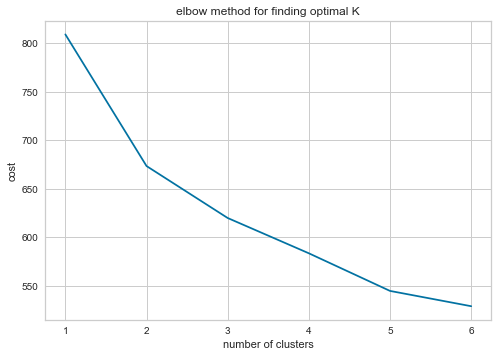

In [18]:
# 엘보우 시각화
cost = []
K = range(1, 7)
for num in K:
    kproto = KPrototypes(n_clusters = num, n_init=3)
    kproto.fit_predict(df_proto, categorical=categorical_columns)
    cost.append(kproto.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.title('elbow method for finding optimal K')
plt.show()

k = 2로 선택 후, 진행

In [ ]:
#Actual clustering (k=2)
kproto = KPrototypes(n_clusters= 2,n_init=3)
clusters = kproto.fit_predict(df_proto, categorical=categorical_columns)
df_proto['clusters'] = clusters

In [ ]:
# 각 클러스터별 개수 분포 확인
df_proto['clusters'].value_counts()

In [ ]:
# 클러스터별 변수 평균치 비교
df_proto = pd.get_dummies(df_proto, columns = ['여행지선택이유'])
result = df_proto.groupby('clusters').mean().T
result

In [ ]:
# 중간 파일 저장
result.to_csv('resultbycluster.csv', encoding = 'utf-8-sig')

# 5. 추천알고리즘 생성 - 랜덤포레스트 모델 변수기반
- 변수 중요도 순으로 6개를 유저에게 질문
- 받은 응답을 x 값으로 넣어 모델 내에서 클러스터 predict 한 후 코스 추천

In [ ]:
X_scaled = df_proto.drop(['clusters'], axis = 1)
y_scaled = df_proto['clusters']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 0)
model = RandomForestClassifier(random_state=428)
model.fit(X_scaled, y_scaled)

pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy))

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': model.feature_importances_
})
ftr = feature_importance.sort_values(by= 'importance', ascending = False)
ftr

In [ ]:
# 변수 중요도 시각화 
plt.figure(figsize = (13,10))
plt.title('Feature Importances')
sns.barplot(x= ftr.importance, y = ftr.feature)
plt.show()

In [ ]:
# 상위 7개 변수만 넣어서 다시 모델 생성
X_scaled = df_proto[['음식관광','휴식/휴양','자연 및 풍경감상','지출_음식점','여행지선택이유_여행지 지명도','지출_숙박비','지출_교통비']]
y_scaled = df_proto['clusters']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 0)
model = RandomForestClassifier(random_state=428)
model.fit(X_scaled, y_scaled)

pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy))

 상위 7개만 사용해도 정확도에 큰 변화가 없음을 확인

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': model.feature_importances_
})
feature_importance.sort_values(by= 'importance', ascending = False)

In [ ]:
X_test.columns

In [ ]:
# 유저로부터 값을 입력받아 각 클러스터로 분류하는 함수 구현
def travel_type(user):
    Y_predict = model.predict([user])       
    if Y_predict[0] == 1:
        return '\n여행에서도 열정 넘치는 당신, 당신의 여행타입은 열혈 탐형가형이네요🚴‍'
    
    else:
        return '\n휴식이 필요한 당신, 당신의 여행타입은 잔잔한 휴양자형이네요🏝'

In [ ]:
user = []
print('\n')
print("<🍊🌿에코탐라와 함께하는 여행 성향 TEST🍊🌿>")
print('그렇다 = 1, 아니다 =0으로 답변해주세요.\n')

user.append((int(input("여행 갔으면 무조건 맛집 탐방 필수!: "))))
user.append((int(input("여행은 쉬러가는거지~: "))))
user.append((int(input("도심에서 벗어나 여행지의 자연과 함께!: "))))
user.append((int(input("여기서만 맛볼 수 있는 음식이니까~ FLEX💵😎!: "))))
user.append((int(input("나만 아는 숨겨진 명소를 찾아볼래!: "))))
user.append((int(input("숙소에 들이는 돈은 아깝지 않아!:"))))
user.append((int(input("멀리! 빨리! 편하게! 교통비 아끼지 말자~:"))))

print(travel_type(user))